In [131]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
num_particles = 100 
num_dimensions = 2 
swarm = np.random.rand(num_particles, num_dimensions) * 10 - 5  #range [-5, 5]
velocities = np.random.rand(num_particles, num_dimensions) * 0.1 

In [133]:
def objective_function(position):
    return 10 * len(position) + sum([x**2 - 10 * np.cos(2 * np.pi * x) for x in position])

MAB Formulation:

In [ ]:
num_arms = 3
rewards = np.zeros((num_particles, num_arms)) 
counts = np.ones((num_particles, num_arms)) 

PSO Initialization

In [ ]:
personal_best_positions = np.copy(swarm)
personal_best_scores = np.array([objective_function(p) for p in swarm])
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)
max_iterations = 100

In [ ]:
global_best_scores = []
arm_selection_counts = np.zeros(num_arms) 

In [ ]:
for iteration in range(max_iterations):
    for i, particle in enumerate(swarm):
        epsilon = 0.1
        if np.random.rand() < epsilon:
            arm = np.random.randint(0, num_arms)
        else:
            arm = np.argmax(rewards[i] / counts[i])

        arm_selection_counts[arm] += 1

        # Update velocity and position 
        if arm == 0:  
            w, c1, c2 = 0.5, 2.0, 2.0
        elif arm == 1:  
            w, c1, c2 = 0.7, 1.5, 2.5
        else:  
            w, c1, c2 = 0.9, 2.5, 1.5

        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particle)
            + c2 * r2 * (global_best_position - particle)
        )
        swarm[i] = particle + velocities[i]

        score = objective_function(swarm[i])

        if score < personal_best_scores[i]:
            personal_best_positions[i] = swarm[i]
            personal_best_scores[i] = score

        if score < global_best_score:
            global_best_position = swarm[i]
            global_best_score = score

        reward = max(personal_best_scores[i] - score, 0)  # Reward is improvement in score
        rewards[i, arm] += reward
        counts[i, arm] += 1

    global_best_scores.append(global_best_score)


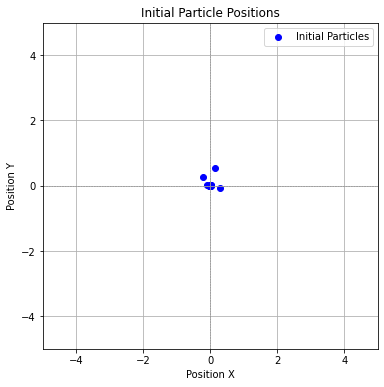

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(swarm[:, 0], swarm[:, 1], color="blue", label="Initial Particles")
plt.title("Initial Particle Positions")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.axhline(0, color='gray', lw=0.5, ls='--')  
plt.axvline(0, color='gray', lw=0.5, ls='--')  
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.legend()
plt.show()

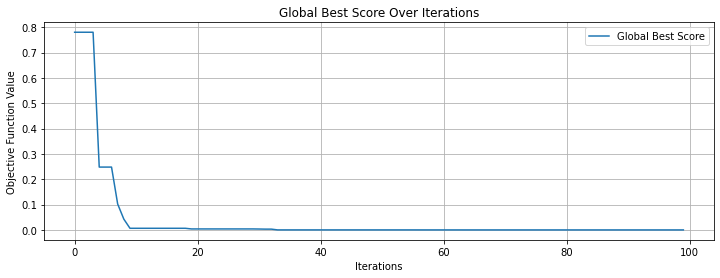

In [139]:
plt.figure(figsize=(12, 4))
plt.plot(global_best_scores, label="Global Best Score")
plt.title("Global Best Score Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.legend()
plt.grid()
plt.show()


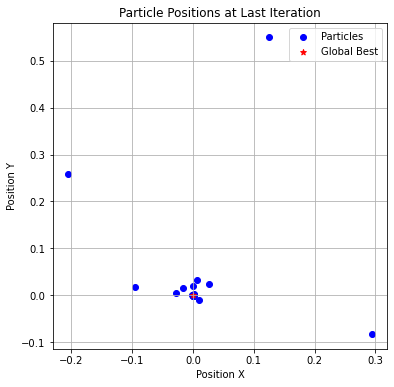

In [140]:
if num_dimensions == 2:
    plt.figure(figsize=(6, 6))
    plt.scatter(swarm[:, 0], swarm[:, 1], color="blue", label="Particles")
    plt.scatter(global_best_position[0], global_best_position[1], color="red", label="Global Best", marker="*")
    plt.title("Particle Positions at Last Iteration")
    plt.xlabel("Position X")
    plt.ylabel("Position Y")
    plt.legend()
    plt.grid()
    plt.show()

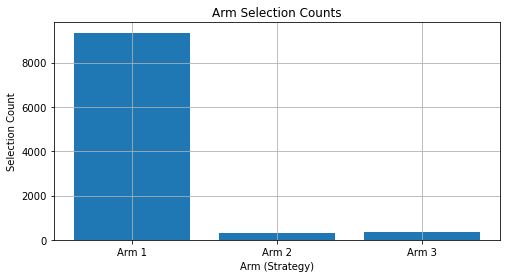

In [141]:
plt.figure(figsize=(8, 4))
plt.bar(range(num_arms), arm_selection_counts, tick_label=["Arm 1", "Arm 2", "Arm 3"])
plt.title("Arm Selection Counts")
plt.xlabel("Arm (Strategy)")
plt.ylabel("Selection Count")
plt.grid()
plt.show()

In [142]:
print("Best position found:", global_best_position)
print("Best score:", global_best_score)

Best position found: [-4.41671603e-07 -8.88471592e-07]
Best score: 1.3814371868647868e-10
